In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
from scipy.stats import mode
import plotly.offline as pyo
pyo.init_notebook_mode()

cf.go_offline()
import warnings
warnings.simplefilter('ignore')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import f1_score
import pylab as plt
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

plt.rcParams['figure.figsize']=(15, 8)

In [11]:
df = pd.read_csv('data/m0001_train.csv')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  7000 non-null   float64
 1   feature2  7000 non-null   float64
 2   feature3  7000 non-null   float64
 3   feature4  7000 non-null   float64
 4   feature5  7000 non-null   float64
 5   feature6  7000 non-null   float64
 6   feature7  7000 non-null   float64
 7   target    7000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 437.6 KB


In [18]:
X = df.drop(['target'], axis=1)
Y = df.target

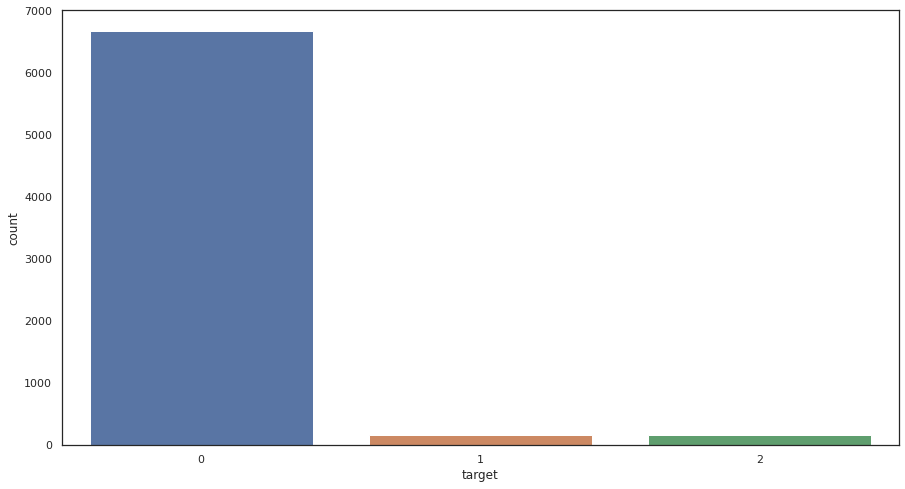

In [20]:
sns.countplot(x= Y);

In [21]:
corr = X.corr(method='pearson')

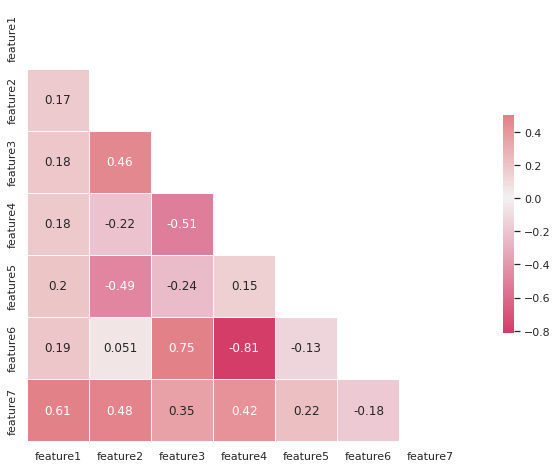

In [22]:
sns.set(style='white')  # estilo blanco

mask=np.triu(np.ones_like(corr, dtype=bool)) # genera una mascara para ocultar la triangular superior

cmap=sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores con degradado


# heatmap o mapa de calor

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=0.5,
            center=0, 
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5},
            annot=True);

In [24]:
# vamos a tratar de balancear el dataset

smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X, Y)

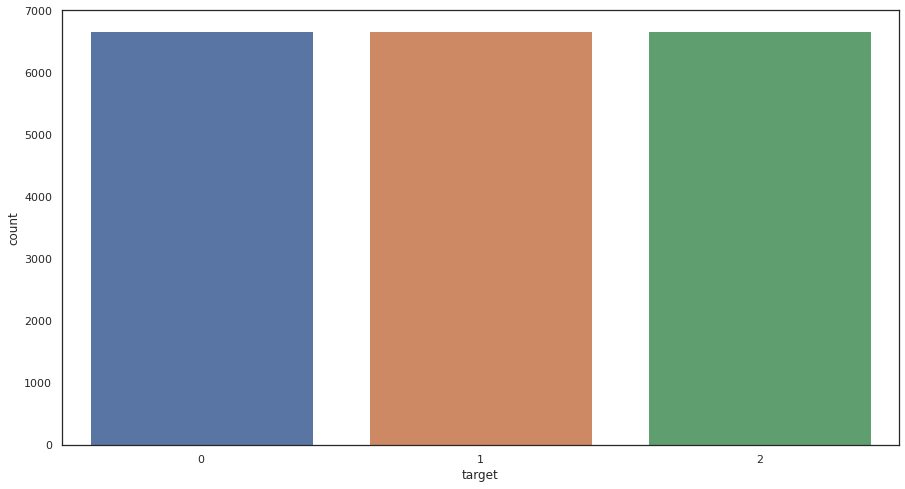

In [25]:
sns.countplot(x=Y_smote);

In [29]:
corr_smote= X_smote.corr(method='pearson')


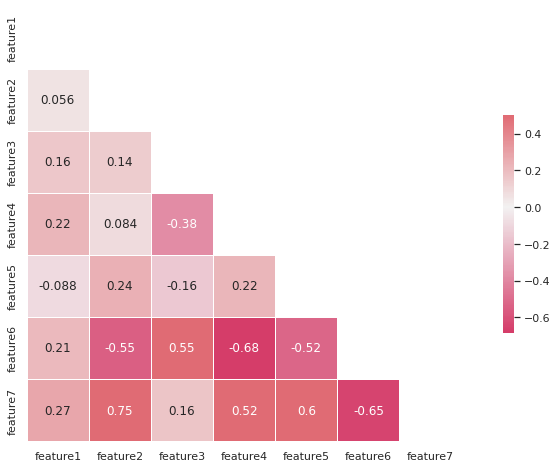

In [31]:

sns.set(style='white')  # estilo blanco

mask=np.triu(np.ones_like(corr_smote, dtype=bool)) # genera una mascara para ocultar la triangular superior

cmap=sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores con degradado


# heatmap o mapa de calor

sns.heatmap(corr_smote,
            mask=mask,
            cmap=cmap,
            vmax=0.5,
            center=0, 
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5},
            annot=True);

In [35]:
X_smote.describe()


feature1      feature2      feature3      feature4      feature5  \
count  20034.000000  20034.000000  20034.000000  20034.000000  20034.000000   
mean      -0.010588     -0.137583     -0.960186      0.308030     -0.138754   
std        1.569056      1.418119      1.193691      1.650309      1.413436   
min       -6.230316     -5.075432     -6.610451     -6.225977     -5.353412   
25%       -1.049592     -1.202279     -1.667298     -0.840736     -1.142467   
50%        0.001020     -0.198497     -0.955740      0.377909     -0.183973   
75%        1.112830      0.854834     -0.218851      1.489938      0.774812   
max        5.339048      4.483914      4.113801      6.059379      3.874894   

           feature6      feature7  
count  20034.000000  20034.000000  
mean      -0.590586     -0.329927  
std        1.904056      1.275082  
min       -7.324168     -4.479117  
25%       -1.812040     -1.386848  
50%       -0.472532     -0.399502  
75%        0.633333      0.665434  
max        7.404997      4.391218

In [36]:
X.describe()

feature1     feature2     feature3     feature4     feature5  \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean      0.006262    -0.932516    -0.972335    -0.001401    -0.951912   
std       1.604982     1.088360     1.420187     1.788680     1.174673   
min      -6.230316    -5.075432    -6.610451    -6.225977    -5.353412   
25%      -1.136344    -1.665142    -1.868669    -1.255364    -1.743266   
50%       0.052355    -0.957348    -0.956116     0.024775    -0.997887   
75%       1.179122    -0.223722    -0.072890     1.261277    -0.195576   
max       5.339048     4.483914     4.113801     6.059379     3.874894   

          feature6     feature7  
count  7000.000000  7000.000000  
mean      0.375366    -1.154591  
std       1.567207     0.902826  
min      -7.324168    -4.479117  
25%      -0.604719    -1.794917  
50%       0.332823    -1.286691  
75%       1.344787    -0.622253  
max       7.404997     4.391218

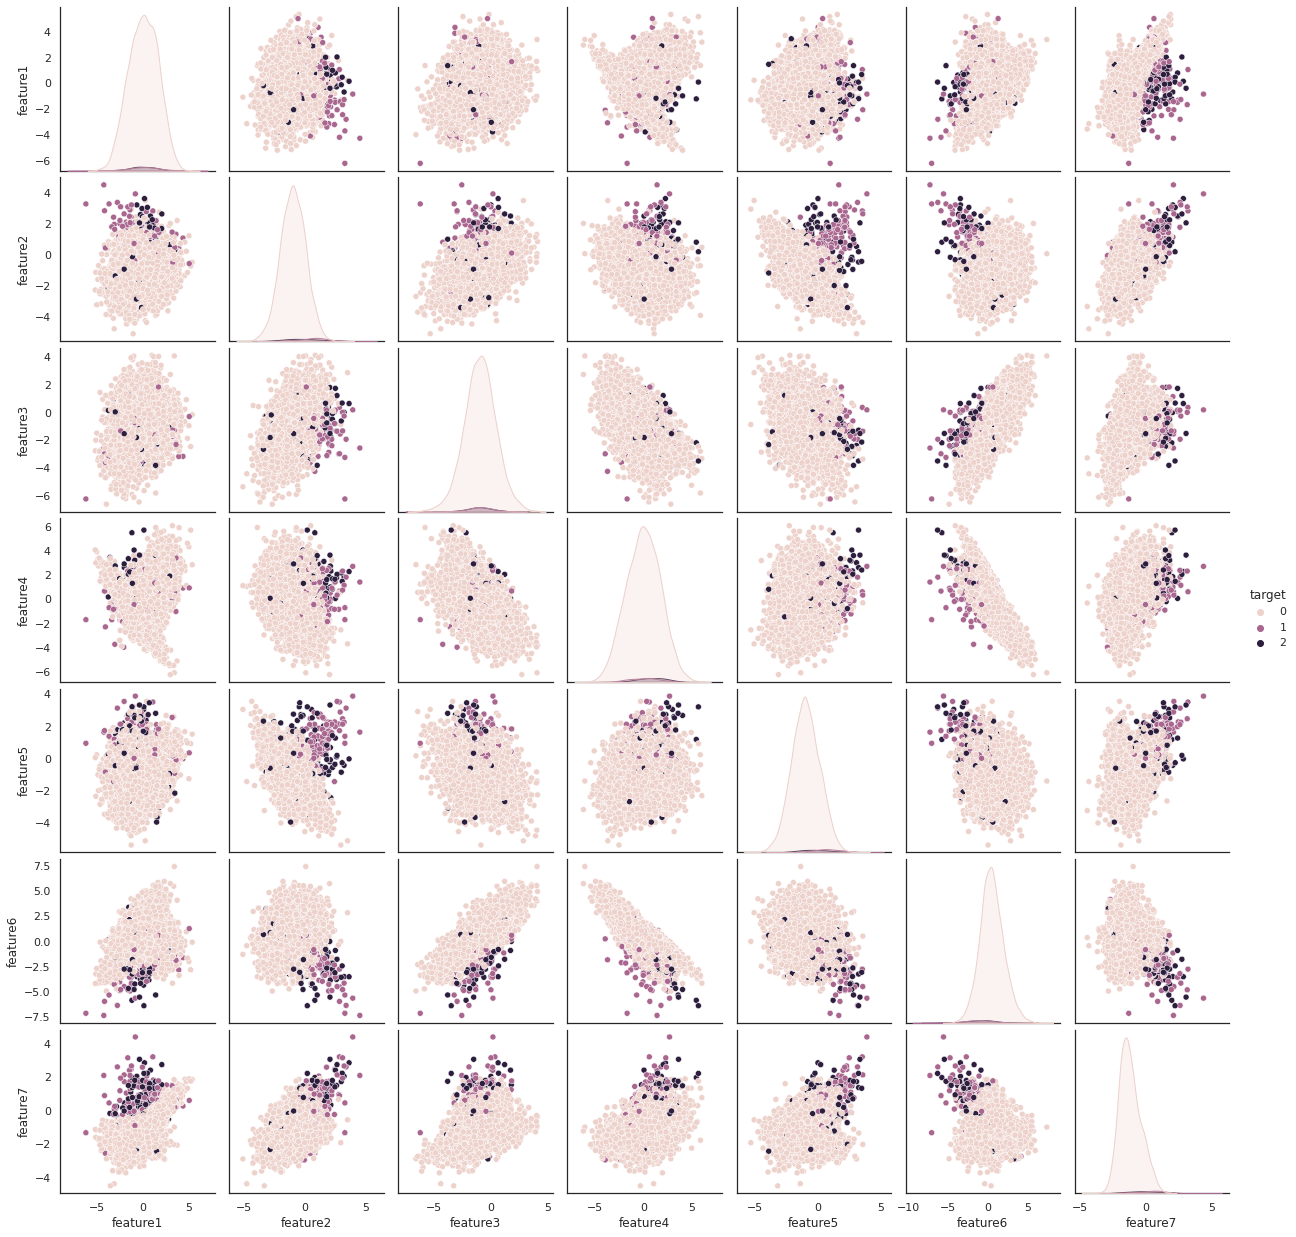

In [40]:
sns.pairplot(df, hue='target');

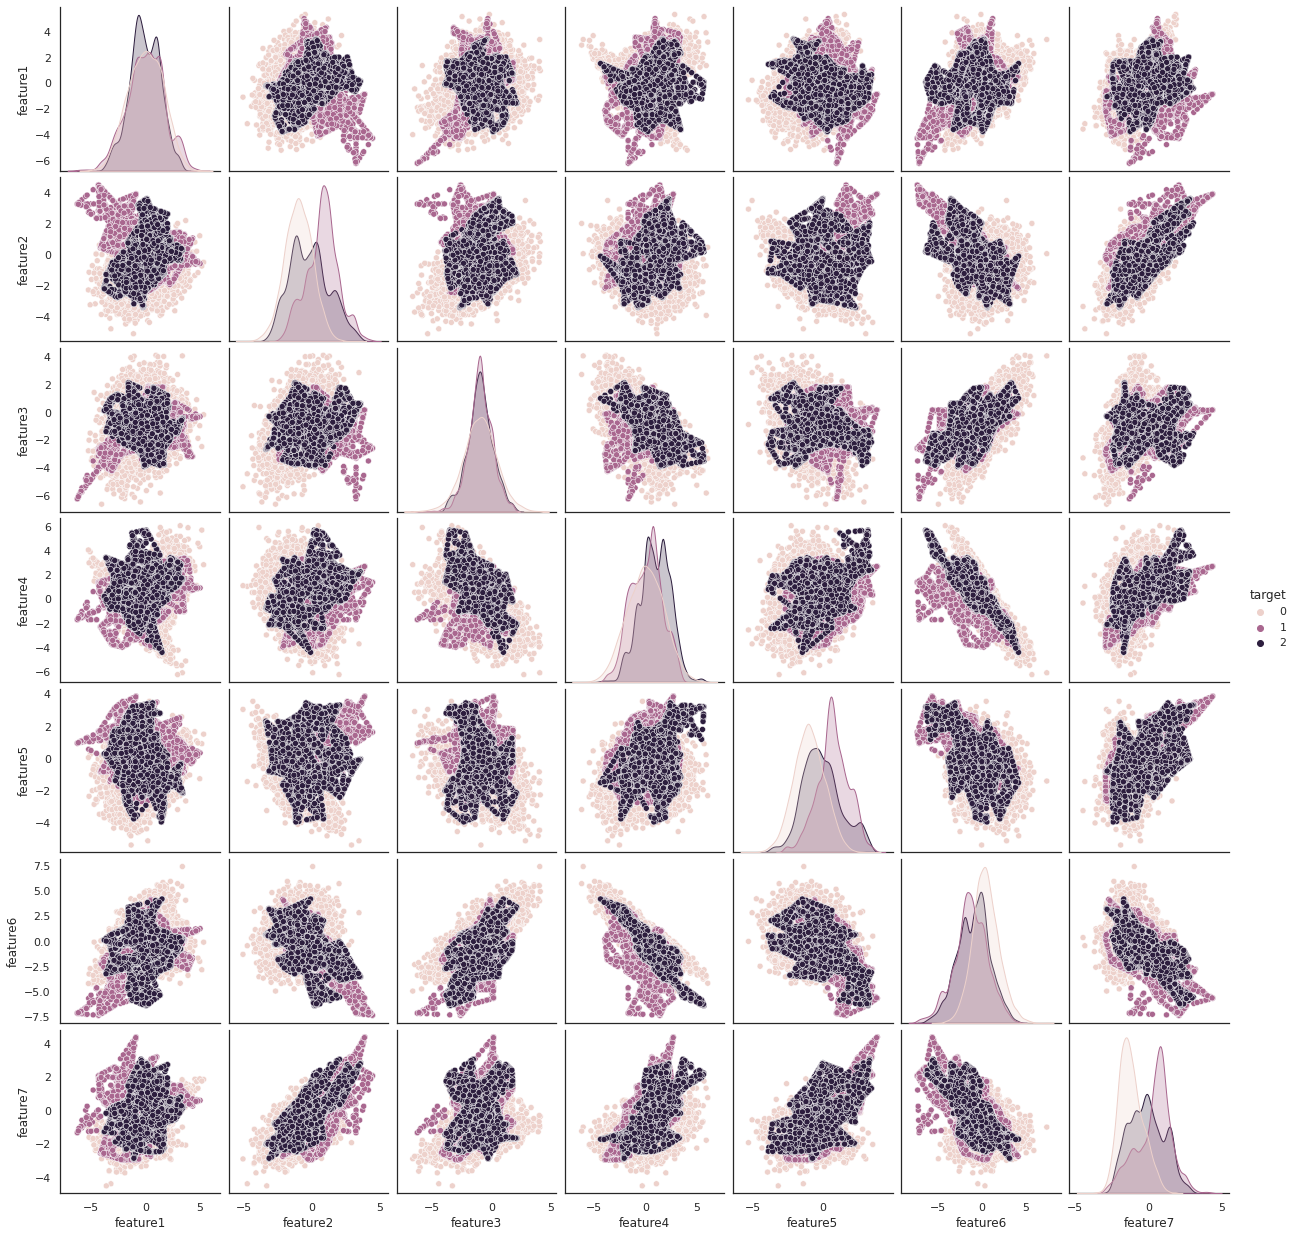

In [42]:
X_smote['target']= Y_smote
sns.pairplot(X_smote, hue='target');

In [39]:
pipelines = {
    'rf': make_pipeline(RandomForestRegressor(random_state=42)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=42)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=42)),
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=42)),
    'enet':make_pipeline(StandardScaler(), ElasticNet(random_state=42)),
    'lr': make_pipeline(StandardScaler(), LinearRegression()),
    'knn': make_pipeline(StandardScaler(), KNeighborsRegressor()),
    'svr': make_pipeline(StandardScaler(), SVR())}

In [47]:
X_smote = X_smote.drop(['target'], axis=1)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=42)

In [56]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote,Y_smote, test_size = 0.20, random_state=42)

In [57]:
for key, value in pipelines.items():
    print(key, type(value))
    rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200,300,500,750],
    'randomforestregressor__max_features': ['auto', 0.3, 0.6]
    }

    gb_hyperparameters = {
    'gradientboostingregressor__n_estimators':[100, 200, 300,500,750],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth':[1, 3, 5]
    }

    ridge_hyperparameters = {
        'ridge__alpha':[0.01, 0.05, 0.1, 1, 5]
    }

    lasso_hyperparameters = {
        'lasso__alpha':[0.01, 0.05, 0.1, 0.5, 1, 5]
    }

    enet_hyperparameters = {
        'elasticnet__alpha':[0.01, 0.05, 0.1, 1, 5],
        'elasticnet__l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9]
    }

    lr_hyperparameters = {
        'linearregression__n_jobs': [-1]
    }
    
    knn_hyperparameters = {
        "kneighborsregressor__n_neighbors": np.arange(1,50),
        "kneighborsregressor__weights": ["uniform","distance"]
    }
    svr_hyperparameters= {
    'svr__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'svr__degree':[3,5,7]
    }

rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
lasso <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
lr <class 'sklearn.pipeline.Pipeline'>
knn <class 'sklearn.pipeline.Pipeline'>
svr <class 'sklearn.pipeline.Pipeline'>


In [58]:
hyperparameter_grids = {
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
    'ridge': ridge_hyperparameters,
    'lasso': lasso_hyperparameters,
    'enet': enet_hyperparameters,
    'lr': lr_hyperparameters,
    'knn': knn_hyperparameters,
    'svr': svr_hyperparameters
    
}

In [59]:
models = {}

for key in pipelines.keys():
    models[key]= GridSearchCV(pipelines[key],hyperparameter_grids[key], cv=5)
    
models.keys()

dict_keys(['rf', 'gb', 'ridge', 'lasso', 'enet', 'lr', 'knn', 'svr'])

In [60]:
best_estimators = []

for key in models.keys():
    clf = models[key].fit(X_train_smote,Y_train_smote)
    best_estimators.append(clf.best_estimator_)
    print(key, "is trained and tuned")
    print('Method: {} Best: {}' .format(key,clf.best_estimator_))

rf is trained and tuned
Method: rf Best: Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_features=0.6, n_estimators=500,
                                       random_state=42))])
gb is trained and tuned
Method: gb Best: Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=5, n_estimators=750,
                                           random_state=42))])
ridge is trained and tuned
Method: ridge Best: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=5, random_state=42))])
lasso is trained and tuned
Method: lasso Best: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01, random_state=42))])
enet is trained and tuned
Method: enet Best: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.01, l1_ratio=0.1, random_state=42))])
lr is trained and tuned
Meth

In [73]:
for key in models:
    preds=models[key].predict(X_test_smote)
    print(key)
    '''
    if key == 'rf':
        
    else:
        '''
    print(key)
    print("R squared: ", round(r2_score(Y_test_smote,preds),3))
    print('MAE: ', round(mean_absolute_error(Y_test_smote,preds),3))
    print("MSE score:", round(mean_squared_error(preds, Y_test_smote), 4))
    print("RMSE score:", round(np.sqrt(mean_squared_error(preds, Y_test_smote)), 4))
    print("MAPE score:", round(mean_absolute_percentage_error(preds, Y_test_smote), 4))
    print("--------------------")
    print(metrics.classification_report(preds, Y_test_smote))

rf
rf
R squared:  0.916
MAE:  0.113
MSE score: 0.0554
RMSE score: 0.2354
MAPE score: 0.3775
--------------------


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [76]:
modelRF = RandomForestClassifier(n_estimators = 1500, max_depth = 100, n_jobs = -1, criterion = 'entropy', min_samples_split = 3, warm_start = True)

Puntuación f1_score de los datos tratados con smote: 0.9733939304382337
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1317
           1       0.97      0.99      0.98      1328
           2       0.98      0.98      0.98      1362

    accuracy                           0.97      4007
   macro avg       0.97      0.97      0.97      4007
weighted avg       0.97      0.97      0.97      4007

--------------------


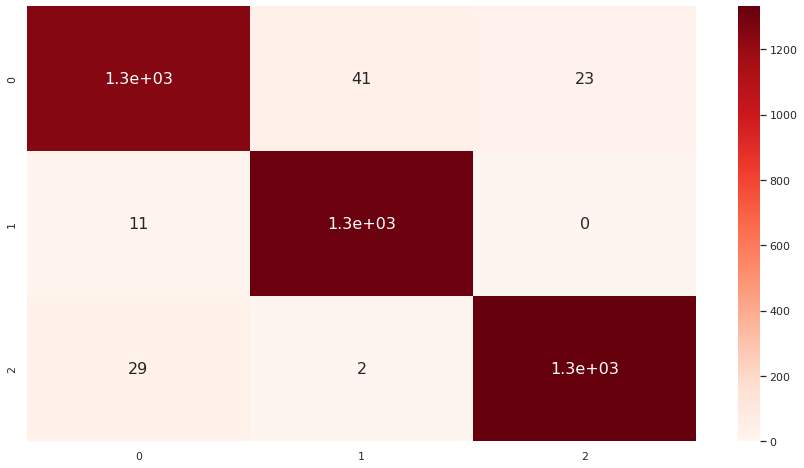

In [79]:
modelRF.fit(X_train_smote,Y_train_smote)
predict = modelRF.predict(X_test_smote)
array_smote = confusion_matrix(predict, Y_test_smote)

df_res_smote = pd.DataFrame(array_smote)

print(f"Puntuación f1_score de los datos tratados con smote:", f1_score( Y_test_smote ,predict, average='macro'))
print(metrics.classification_report(predict, Y_test_smote))
print("--------------------")
sns.set(font_scale =1)
plt.show(sns.heatmap(df_res_smote, annot = True, annot_kws={'size':16}, cmap = 'Reds'))

In [81]:
import scikitplot as skplt

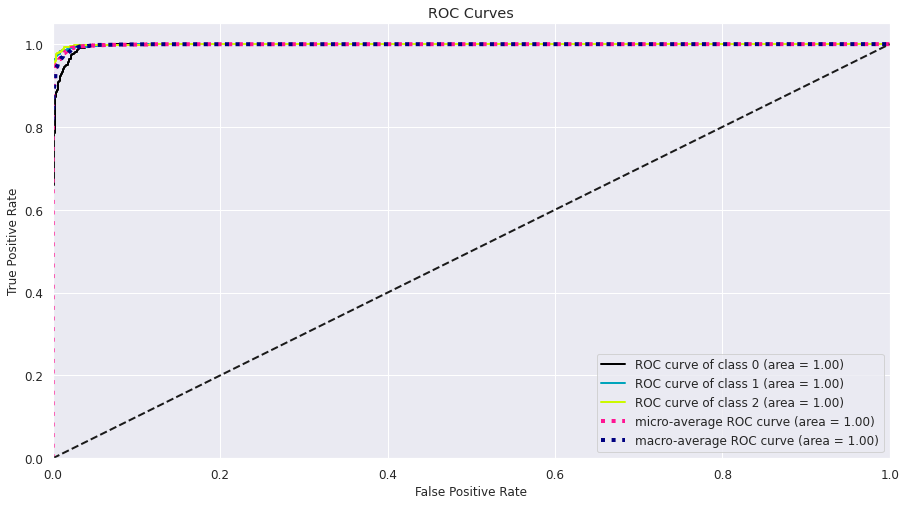

In [82]:
predict_prob_smote = modelRF.predict_proba(X_test_smote)
skplt.metrics.plot_roc(Y_test_smote, predict_prob_smote)
plt.show()

In [83]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20034 entries, 0 to 20033
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  20034 non-null  float64
 1   feature2  20034 non-null  float64
 2   feature3  20034 non-null  float64
 3   feature4  20034 non-null  float64
 4   feature5  20034 non-null  float64
 5   feature6  20034 non-null  float64
 6   feature7  20034 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB
